In [186]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [207]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
cities_no =[]
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city_lo = citipy.nearest_city(lat_lng[0], lat_lng[1])
    city = city_lo.city_name
    city_no = city_lo.country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        cities_no.append(city_no)
# Print the city count to confirm sufficient count
len(cities)


647

In [189]:
cities


['olginskaya',
 'punta arenas',
 'gat',
 'luderitz',
 'yar-sale',
 'souillac',
 'vaini',
 'bemidji',
 'misratah',
 'karratha',
 'geraldton',
 'port elizabeth',
 'aswan',
 'vostok',
 'taolanaro',
 'sabha',
 'ponta do sol',
 'mahebourg',
 'tasbuget',
 'arman',
 'puerto madryn',
 'requena',
 'pisco',
 'katsuura',
 'aykhal',
 'busselton',
 'lavrentiya',
 'thompson',
 'mataura',
 'attawapiskat',
 'san cristobal',
 'ribeira grande',
 'tessalit',
 'fairbanks',
 'rikitea',
 'inongo',
 'avarua',
 'new norfolk',
 'ossora',
 'talnakh',
 'vestmanna',
 'hermanus',
 'hobart',
 'albany',
 'lukovetskiy',
 'barrow',
 'stekolnyy',
 'aksu',
 'bethel',
 'lorengau',
 'bluff',
 'khatanga',
 'touros',
 'barentsburg',
 'ostrovnoy',
 'saldanha',
 'belushya guba',
 'snyder',
 'leningradskiy',
 'mentok',
 'dikson',
 'labutta',
 'puerto ayora',
 'zhigansk',
 'kapaa',
 'severo-kurilsk',
 'huilong',
 'cabo san lucas',
 'airai',
 'arraial do cabo',
 'mutsu',
 'alghero',
 'hunza',
 'chapais',
 'tabialan',
 'cape town

## Perform API Calls
Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [190]:
Row =[]
set_no = 1
Record_count = 1
print("Beginning Data Retrieval")
print("------------------------------")
for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = url +"appid=" + api_key + "&q=" + city + "&units=" +"imperial"
    weather_response = requests.get(query_url)
    weather_ct = weather_response.json()
    try:
        Row.append([weather_ct["name"],weather_ct["clouds"]["all"],weather_ct["sys"]['country'],weather_ct["dt"],weather_ct["main"]["humidity"],weather_ct["coord"]["lat"],weather_ct["coord"]["lon"],weather_ct["main"]["temp_max"],weather_ct["wind"]["speed"]])
        print(f'Processing Record {Record_count} of Set {set_no} | {city}')
        if ((Record_count == 50) & (set_no == 1)) or ((Record_count == 49) & (set_no != 1)):
            set_no +=1
            Record_count = 0
        else: Record_count +=1
    except KeyError:
        print("City not found. Skipping...")
print("--------------------------------------------")
print("Data Retrieval Complete")
print("--------------------------------------------")
    

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | olginskaya
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | gat
Processing Record 4 of Set 1 | luderitz
Processing Record 5 of Set 1 | yar-sale
Processing Record 6 of Set 1 | souillac
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | bemidji
Processing Record 9 of Set 1 | misratah
Processing Record 10 of Set 1 | karratha
Processing Record 11 of Set 1 | geraldton
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | aswan
Processing Record 14 of Set 1 | vostok
City not found. Skipping...
Processing Record 15 of Set 1 | sabha
Processing Record 16 of Set 1 | ponta do sol
Processing Record 17 of Set 1 | mahebourg
City not found. Skipping...
Processing Record 18 of Set 1 | arman
Processing Record 19 of Set 1 | puerto madryn
Processing Record 20 of Set 1 | requena
Processing Record 21 of Set 1 | pisco
Processing Record 22 of Set 1 | katsu

Processing Record 32 of Set 4 | guerrero negro
Processing Record 33 of Set 4 | east london
Processing Record 34 of Set 4 | praxedis guerrero
Processing Record 35 of Set 4 | camacha
Processing Record 36 of Set 4 | bud
Processing Record 37 of Set 4 | bucarasica
City not found. Skipping...
Processing Record 38 of Set 4 | kalabo
Processing Record 39 of Set 4 | kuybysheve
Processing Record 40 of Set 4 | vardo
Processing Record 41 of Set 4 | santa maria
Processing Record 42 of Set 4 | chunoyar
Processing Record 43 of Set 4 | atikokan
Processing Record 44 of Set 4 | shimoda
Processing Record 45 of Set 4 | makakilo city
Processing Record 46 of Set 4 | namatanai
City not found. Skipping...
Processing Record 47 of Set 4 | kavaratti
Processing Record 48 of Set 4 | lazaro cardenas
Processing Record 49 of Set 4 | kruisfontein
Processing Record 0 of Set 5 | senanga
City not found. Skipping...
Processing Record 1 of Set 5 | pangnirtung
Processing Record 2 of Set 5 | zeya
Processing Record 3 of Set 5 

Processing Record 12 of Set 8 | erzin
Processing Record 13 of Set 8 | cayenne
Processing Record 14 of Set 8 | whitecourt
Processing Record 15 of Set 8 | aklavik
Processing Record 16 of Set 8 | mayumba
Processing Record 17 of Set 8 | denpasar
Processing Record 18 of Set 8 | deputatskiy
Processing Record 19 of Set 8 | constantine
Processing Record 20 of Set 8 | marsa matruh
Processing Record 21 of Set 8 | balasan
Processing Record 22 of Set 8 | maceio
Processing Record 23 of Set 8 | santa lucia
Processing Record 24 of Set 8 | vila velha
Processing Record 25 of Set 8 | juegang
Processing Record 26 of Set 8 | rocha
Processing Record 27 of Set 8 | sisimiut
Processing Record 28 of Set 8 | lipin bor
Processing Record 29 of Set 8 | carbonia
City not found. Skipping...
Processing Record 30 of Set 8 | east lansing
Processing Record 31 of Set 8 | dudinka
Processing Record 32 of Set 8 | linxia
Processing Record 33 of Set 8 | salinopolis
Processing Record 34 of Set 8 | inirida
Processing Record 35 

## Convert Raw Data to DataFrame
Export the city data into a .csv.
Display the DataFrame

In [195]:
data =pd.DataFrame(Row,columns=("City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"))
data.count()

City          545
Cloudiness    545
Country       545
Date          545
Humidity      545
Lat           545
Lng           545
Max Temp      545
Wind Speed    545
dtype: int64

In [198]:
data.to_csv(output_data_file)
data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Olginskaya,0,RU,1563598734,48,45.94,38.55,76.37,4.94
1,Punta Arenas,0,CL,1563598734,80,-53.16,-70.91,33.80,13.87
2,Gat,20,SN,1563598735,78,14.69,-16.54,73.40,3.36
3,Luderitz,0,NA,1563598735,77,-26.65,15.16,55.67,24.25
4,Yar-Sale,78,RU,1563598735,47,66.83,70.83,77.99,6.91


## Plotting the Data
Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

   ### Latitude vs. Temperature Plot

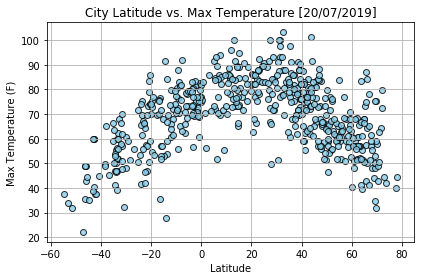

In [201]:
fig,ax = plt.subplots(figsize = (6,4))
ax.scatter(x=data["Lat"],y=data["Max Temp"],facecolor ="skyblue",edgecolor="k",alpha = 0.8,linewidth =1)
date =time.strftime("%d/%m/%Y")
plt.title(f"City Latitude vs. Max Temperature [{date}]")
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (F)")
ax.grid()
plt.tight_layout()
plt.savefig("output_data/Lat_Temp.png")
plt.show()

### Latitude vs. Humidity Plot

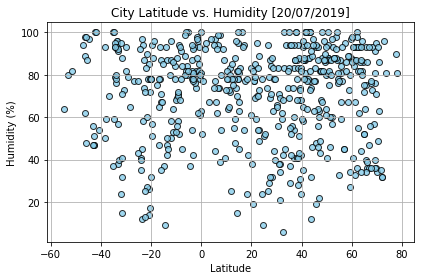

In [202]:
fig,ax = plt.subplots(figsize = (6,4))
ax.scatter(data["Lat"],data["Humidity"],facecolor ="skyblue",edgecolor="k",alpha = 0.8,linewidth =1)
plt.title(f"City Latitude vs. Humidity [{date}]")
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
ax.grid()
plt.tight_layout()
plt.savefig("output_data/Lat_Humid.png")
plt.show()

### Latitude vs. Cloudiness Plot

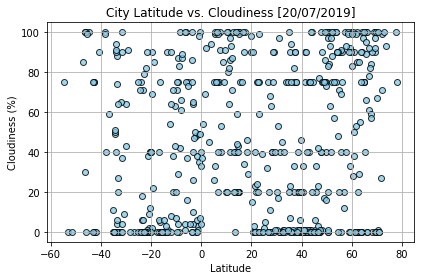

In [203]:
fig,ax = plt.subplots(figsize = (6,4))
ax.scatter(data["Lat"],data["Cloudiness"],facecolor ="skyblue",edgecolor="k",alpha = 0.8,linewidth =1)
plt.title(f"City Latitude vs. Cloudiness [{date}]")
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
ax.grid()
plt.tight_layout()
plt.savefig("output_data/Lat_Cloud.png")
plt.show()

### Latitude vs. Wind Speed Plot

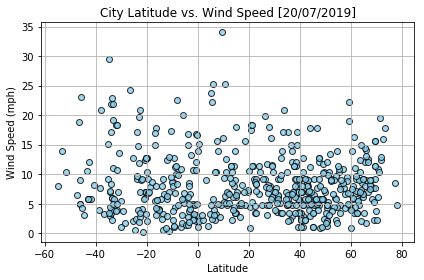

In [204]:
fig,ax = plt.subplots(figsize = (6,4))
ax.scatter(data["Lat"],data["Wind Speed"],facecolor ="skyblue",edgecolor="k",alpha = 0.8,linewidth =1)
plt.title(f"City Latitude vs. Wind Speed [{date}]")
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph)")
ax.grid()
plt.tight_layout()
plt.savefig("output_data/Lat_Wind.png")
plt.show()